## Gradient Descent Implementation

In [1]:
#Importing the dataset
import pandas as pd
housing = pd.read_csv('Housing.csv')
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
# Converting Yes to 1 and No to 0
housing['mainroad'] = housing['mainroad'].map({'yes': 1, 'no': 0})
housing['guestroom'] = housing['guestroom'].map({'yes': 1, 'no': 0})
housing['basement'] = housing['basement'].map({'yes': 1, 'no': 0})
housing['hotwaterheating'] = housing['hotwaterheating'].map({'yes': 1, 'no': 0})
housing['airconditioning'] = housing['airconditioning'].map({'yes': 1, 'no': 0})
housing['prefarea'] = housing['prefarea'].map({'yes': 1, 'no': 0})

In [3]:
#Converting furnishingstatus column to binary column using get_dummies
status = pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)
housing.drop(['furnishingstatus'],axis=1,inplace=True)

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
price              545 non-null float64
area               545 non-null float64
bedrooms           545 non-null float64
bathrooms          545 non-null float64
stories            545 non-null float64
mainroad           545 non-null float64
guestroom          545 non-null float64
basement           545 non-null float64
hotwaterheating    545 non-null float64
airconditioning    545 non-null float64
parking            545 non-null float64
prefarea           545 non-null float64
semi-furnished     545 non-null float64
unfurnished        545 non-null float64
dtypes: float64(14)
memory usage: 59.7 KB


In [8]:
# Normalisisng the data
housing = (housing - housing.mean())/housing.std()
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,4.562174,1.045766,1.402131,1.420507,1.376952,0.405251,-0.464888,-0.733865,-0.219063,1.471267,1.516299,1.803284,-0.844113,-0.69579
1,4.000809,1.755397,1.402131,5.400847,2.529700,0.405251,-0.464888,-0.733865,-0.219063,1.471267,2.676950,-0.553526,-0.844113,-0.69579
2,4.000809,2.216196,0.047235,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,-0.678439,1.516299,1.803284,1.182502,-0.69579
3,3.982096,1.082630,1.402131,1.420507,0.224204,0.405251,-0.464888,1.360148,-0.219063,1.471267,2.676950,1.803284,-0.844113,-0.69579
4,3.551716,1.045766,1.402131,-0.569663,0.224204,0.405251,2.147110,1.360148,-0.219063,1.471267,1.516299,-0.553526,-0.844113,-0.69579


In [9]:
# Simple linear regression
# Assign feature variable X
X = housing['area']

# Assign response variable to y
y = housing['price']

In [10]:
# Conventional way to import seaborn
import seaborn as sns

# To visualise in the notebook
%matplotlib inline

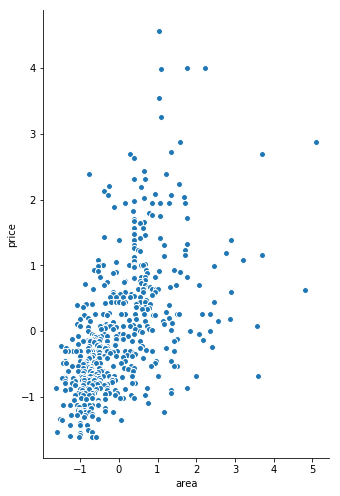

In [11]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(housing, x_vars='area', y_vars='price',size=7, aspect=0.7, kind='scatter')

**For linear regression we use a cost function known as the mean squared error or MSE.**

<img src="gd1.png"/>

Now we will apply partial derivative with respect to m and c and will equate it to zero to find the least value of m and c for which our cost function get the lowest value as possible.

<img src="gd2.png"/>

Now to apply gradient descent from scratch we need our X and y variables as numpy arrays, Let's convert them.

In [10]:
import numpy as np
X = np.array(X)
y = np.array(y)

# Model before Gradient Descent

Taken Slope and Intercept = 0 initially

In [34]:
def before_gradient(X, y, m_current=0.535997, c_current=8.6, iters=1000, learning_rate=0.01):
    N = float(len(y))
    #gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    #for i in range(iters):
    y_current = (m_current * X) + c_current
    cost = sum([data**2 for data in (y-y_current)]) / N

    return cost
        
cost_gradients=before_gradient(X,y)
cost_gradients

74.67139912633668

# Gradient Descent Implementation

In [32]:
# Implement gradient descent function
# Takes in X, y, current m and c (both initialised to 0), num_iterations, learning rate
# returns gradient at current m and c for each pair of m and c

def gradient(X, y, m_current=0, c_current=0, iters=500, learning_rate=0.01):
    N = float(len(y))
    gd_df = pd.DataFrame( columns = ['m_current', 'c_current','cost'])
    for i in range(iters):
        y_current = (m_current * X) + c_current
        cost = sum([data**2 for data in (y-y_current)]) / N
        m_gradient = -(2/N) * sum(X * (y - y_current))
        c_gradient = -(2/N) * sum(y - y_current)
        m_current = m_current - (learning_rate * m_gradient)
        c_current = c_current - (learning_rate * c_gradient)
        gd_df.loc[i] = [m_current,c_current,cost]
    return(gd_df)

In [33]:
# print gradients at multiple (m, c) pairs
# notice that gradient decreased gradually towards 0
# we have used 1000 iterations, can use more if needed
gradients = gradient(X,y)
gradients

,m_current,c_current,cost
0,0.010700,6.046132e-18,0.998165
1,0.021187,1.771468e-17,0.986830
2,0.031464,2.498307e-17,0.975943
3,0.041536,1.751912e-17,0.965486
4,0.051407,1.129372e-17,0.955442
5,0.061081,1.486273e-17,0.945796
6,0.070562,1.941770e-17,0.936530
7,0.079854,1.995549e-17,0.927631
8,0.088960,2.100664e-17,0.919084
9,0.097884,3.071957e-17,0.910875


In [ ]:
#view details route
@app.route('/view-details', methods = ['GET','POST'])
@jwt_required
@cross_origin(supports_credentials=True)
def dataViewDisplay():
    if request.method == 'POST':
        username_ = get_jwt_identity()
        #username_=request.form.get('username')         
        leadID=request.form.get('lead_id')

        valCheckViewData = db_loginCredential.loginData.find(
            {
                    'username': username_
            }).count()

        #return allDataView
       
        viewDataForm = list() #data converted in list first
        viewDataFinalOut = dict() #data converted to dict for output

        if valCheckViewData == 1:
            viewDataForm = record_Collection.find_one({'lead_id': leadID})
            
            viewDataFinalOut['search_detail']=viewDataForm
            viewDataFinalOut['success'] = True
            returnResp = json.dumps(viewDataFinalOut, default=json_util.default)
            
        else:
            viewDataFinalOut['success'] = False
            viewDataFinalOut['message'] = "Not Allowed!"
        
            returnResp = json.dumps(viewDataFinalOut, default=json_util.default)

        return returnResp